In [4]:
%pip install pandas seaborn numpy matplotlib scikit-learn

import sqlite3
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt
pd.options.display.max_rows = 999
pd.options.display.max_columns = 90

# import scikit-learn libraries
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn import preprocessing

Note: you may need to restart the kernel to use updated packages.


# Load the data (sql db)

In [5]:
con = sqlite3.connect("bmarket.db")

In [6]:
cursor = con.cursor()

# Query the sqlite_master table to get table names
cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")

# Fetch all results
table_names = [row[0] for row in cursor.fetchall()]

print(table_names)

['bank_marketing']


In [7]:
query = "SELECT * FROM bank_marketing"  # Replace 'your_table_name' with the actual table name
df = pd.read_sql_query(query, con)

# 1. Data Understanding and Insights

In [8]:
#
# *** Insights from running .info() ****
# 'Housing Loan' and 'Personal Loan' has null values
#

df.info() # df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Client ID              41188 non-null  int64 
 1   Age                    41188 non-null  object
 2   Occupation             41188 non-null  object
 3   Marital Status         41188 non-null  object
 4   Education Level        41188 non-null  object
 5   Credit Default         41188 non-null  object
 6   Housing Loan           16399 non-null  object
 7   Personal Loan          37042 non-null  object
 8   Contact Method         41188 non-null  object
 9   Campaign Calls         41188 non-null  int64 
 10  Previous Contact Days  41188 non-null  int64 
 11  Subscription Status    41188 non-null  object
dtypes: int64(3), object(9)
memory usage: 3.8+ MB


In [9]:
# Check if there are any duplicated client ID

duplicated = df['Client ID'].duplicated().any()
print(duplicated)

False


In [10]:
# Observation from 'Age'

df['Age'].value_counts()

Age
150 years    4197
31 years     1747
32 years     1646
33 years     1643
36 years     1606
35 years     1584
34 years     1577
30 years     1536
37 years     1345
29 years     1310
38 years     1283
39 years     1281
41 years     1142
40 years     1027
42 years     1020
45 years      979
43 years      950
46 years      920
44 years      892
28 years      892
48 years      875
47 years      833
50 years      778
27 years      765
49 years      758
52 years      689
51 years      676
53 years      654
56 years      636
26 years      630
54 years      628
57 years      597
55 years      589
25 years      536
58 years      511
24 years      414
59 years      409
60 years      254
23 years      207
22 years      123
21 years       90
61 years       66
20 years       62
62 years       55
64 years       55
66 years       54
63 years       50
71 years       47
65 years       42
70 years       40
19 years       38
73 years       33
69 years       32
68 years       31
76 years       30
74 yea

In [11]:
# Observation from 'Occupation'

df['Occupation'].value_counts()

Occupation
admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: count, dtype: int64

In [12]:
# Observations from 'Marital Status'

df['Marital Status'].value_counts()

Marital Status
married     24928
single      11568
divorced     4612
unknown        80
Name: count, dtype: int64

In [13]:
# Observation from 'Education Level'

df['Education Level'].value_counts()

Education Level
university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: count, dtype: int64

In [14]:
# Observation from 'Credit Default'

df['Credit Default'].value_counts()

Credit Default
no         32588
unknown     8597
yes            3
Name: count, dtype: int64

In [15]:
# Observation from 'Housing Loan'

df['Housing Loan'].value_counts()

Housing Loan
yes        8595
no         7411
unknown     393
Name: count, dtype: int64

In [16]:
# Observation from 'Personal Loan'

df['Personal Loan'].value_counts()

Personal Loan
no         30532
yes         5633
unknown      877
Name: count, dtype: int64

In [17]:
# Observation from 'Contact Method'
# Repeat in contact method

df['Contact Method'].value_counts()

Contact Method
Cell         13100
cellular     13044
Telephone     7585
telephone     7459
Name: count, dtype: int64

In [18]:
# Observation from 'Campaign Calls'

df['Campaign Calls'].value_counts()

Campaign Calls
 1     15874
 2      9446
 3      4807
 4      2405
-1      1768
 5      1451
-2      1124
 6       893
 7       566
-3       534
 8       365
 9       253
-4       246
 10      206
 11      156
-5       148
 12      107
-6        86
 13       84
-7        63
 14       58
 17       51
 15       47
 16       46
-8        35
-9        30
 18       30
 20       27
 19       24
 21       22
-11       21
-10       19
-12       18
 24       15
 22       14
 27       11
-14       11
 23       11
 29        9
-13        8
 26        8
 30        7
 31        7
-17        7
 25        7
 28        6
-23        5
-16        5
-15        4
 33        4
 34        3
 32        3
-18        3
-22        3
-20        3
 35        3
 42        2
-28        2
 43        2
 40        2
-21        2
-35        2
-19        2
-29        1
-32        1
 56        1
-41        1
 39        1
 37        1
-25        1
Name: count, dtype: int64

In [19]:
# Observation from 'Previous Contact Days'


df['Previous Contact Days'].value_counts()


Previous Contact Days
999    39673
3        439
6        412
4        118
9         64
2         61
7         60
12        58
10        52
5         46
13        36
11        28
1         26
15        24
14        20
8         18
0         15
16        11
17         8
18         7
19         3
22         3
21         2
26         1
27         1
20         1
25         1
Name: count, dtype: int64

In [20]:
# Observation from 'Subscription Status'

df['Subscription Status'].value_counts()

Subscription Status
no     36548
yes     4640
Name: count, dtype: int64

# 2. Data Cleaning

Since there are no duplicated Client IDs, we will not be removing any rows from the DB.

After that, we will confirm that the DB has no remaining null values by using '.isna().any()' <br>
'.isna' is used to identify missing data in a database. <br>
'.any()' would return one value for each column. *TRUE* if any value in that column is *TRUE*, and *FALSE* if otherwise.  <br>
Then, we do a check to ensure the number of values match for all the columns.

In [21]:
df_filled = df.fillna({
    'Housing Loan': 'unknown',
    'Personal Loan': 'unknown'
})

display(df_filled.isna().any())
print('\n')
display(df_filled.info())

Client ID                False
Age                      False
Occupation               False
Marital Status           False
Education Level          False
Credit Default           False
Housing Loan             False
Personal Loan            False
Contact Method           False
Campaign Calls           False
Previous Contact Days    False
Subscription Status      False
dtype: bool



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Client ID              41188 non-null  int64 
 1   Age                    41188 non-null  object
 2   Occupation             41188 non-null  object
 3   Marital Status         41188 non-null  object
 4   Education Level        41188 non-null  object
 5   Credit Default         41188 non-null  object
 6   Housing Loan           41188 non-null  object
 7   Personal Loan          41188 non-null  object
 8   Contact Method         41188 non-null  object
 9   Campaign Calls         41188 non-null  int64 
 10  Previous Contact Days  41188 non-null  int64 
 11  Subscription Status    41188 non-null  object
dtypes: int64(3), object(9)
memory usage: 3.8+ MB


None

In 'Contact Method', some values appear different but have the same meaning. <br>
1. 'Cell' / 'cellular' <br>
2. 'Telephone' / 'telephone'<br>
Therefore, we will change first value to match the second value using '.replace()' <br>
df['<Column_Name>'] = f['<Column_Name>'].replace('First_value', 'Second value') <br>
With this, any cells with the first value 'Cell' will be replaced with 'cellular'.

In [22]:
df_filled['Contact Method'] = df_filled['Contact Method'].replace('Cell', 'cellular')
df_filled['Contact Method'] = df_filled['Contact Method'].replace('Telephone', 'telephone')

#  Display
df_filled['Contact Method'].value_counts()

Contact Method
cellular     26144
telephone    15044
Name: count, dtype: int64

There is a large percentage of users that are '150 years' old. <br>
Therefore, we have decided to remove the data entries as they are unrealistic for humans and would misled the analysis and confuse the model. <br>
This helps the data be more reliable and meaningful.

In [23]:
df_filled = df_filled.drop(df_filled[df_filled['Age'] == '150 years'].index)
df_filled.info()

<class 'pandas.core.frame.DataFrame'>
Index: 36991 entries, 0 to 41187
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Client ID              36991 non-null  int64 
 1   Age                    36991 non-null  object
 2   Occupation             36991 non-null  object
 3   Marital Status         36991 non-null  object
 4   Education Level        36991 non-null  object
 5   Credit Default         36991 non-null  object
 6   Housing Loan           36991 non-null  object
 7   Personal Loan          36991 non-null  object
 8   Contact Method         36991 non-null  object
 9   Campaign Calls         36991 non-null  int64 
 10  Previous Contact Days  36991 non-null  int64 
 11  Subscription Status    36991 non-null  object
dtypes: int64(3), object(9)
memory usage: 3.7+ MB


Some entries in 'Campaign Calls' appeared as negative numbers. However, the number of calls made to a client cannot be negative in real life. This mistake is almost certainly caused by a data entry mistake or a formatting issue.

As the actual value should logically be the positive number, we corrected these entries by removing the negative sign.

In [24]:
df_filled['Campaign Calls'] = df_filled['Campaign Calls'].astype(str)

df_filled['Campaign Calls'] = df_filled['Campaign Calls'].str.replace('-','')

df_filled['Campaign Calls'] = df_filled['Campaign Calls'].astype(int)


In [25]:
df_cleaned = df_filled
df_cleaned.head()

,Client ID,Age,Occupation,Marital Status,Education Level,Credit Default,Housing Loan,Personal Loan,Contact Method,Campaign Calls,Previous Contact Days,Subscription Status
0,32885,57 years,technician,married,high.school,no,no,yes,cellular,1,999,no
1,3170,55 years,unknown,married,unknown,unknown,yes,no,telephone,2,999,no
2,32207,33 years,blue-collar,married,basic.9y,no,no,no,cellular,1,999,no
3,9404,36 years,admin.,married,high.school,no,no,no,telephone,4,999,no
4,14021,27 years,housemaid,married,high.school,no,unknown,no,cellular,2,999,no


#Data Analysis


Financial Loans Analysis

In [26]:
cd = df_filled['Credit Default'].value_counts()
pl = df['Personal Loan'].value_counts()
hl = df_filled['Housing Loan'].value_counts()
sub = df_filled['Subscription Status'].value_counts()
print(cd)
print(pl)
print(hl)
print(sub)

Credit Default
no         29272
unknown     7716
yes            3
Name: count, dtype: int64
Personal Loan
no         30532
yes         5633
unknown      877
Name: count, dtype: int64
Housing Loan
unknown    22659
yes         7688
no          6644
Name: count, dtype: int64
Subscription Status
no     32800
yes     4191
Name: count, dtype: int64


In [27]:
total_sub = (df_filled['Subscription Status'] == 'yes').sum()
total_no_sub = (df_filled['Subscription Status'] == 'no').sum()
percent_sub = (total_sub / (total_sub + total_no_sub)) * 100
print(f'{percent_sub:.2f}%')

11.33%


In [28]:
total_unknown_all = ((df_filled['Personal Loan'] == 'unknown') & (df_filled['Housing Loan'] == 'unknown') & (df_filled['Credit Default'] == 'unknown')).sum()
percent_unknown_all = (total_unknown_all / (total_sub+total_no_sub)) * 100
print(f'Unknown all: {percent_unknown_all:.2f}%')
print(total_unknown_all)

Unknown all: 1.74%
643


Percentage of people without credit default and are subscribed

Percentage of people with housing loan and are subscribed

Percentage of people with personal loan and are subscribed

In [29]:
total = (total_sub + total_no_sub)
total_sub_nocredit = ((df_filled['Subscription Status'] == 'yes') & (df_filled['Credit Default'] == 'no')).sum()
percent_sub_nocredit = (total_sub_nocredit / total) * 100
total_sub_credit = ((df_filled['Subscription Status'] == 'yes') & (df_filled['Credit Default'] == 'yes')).sum()
percent_sub_credit = (total_sub_credit / total) * 100
total_ssub_unknown = ((df_filled['Subscription Status'] == 'yes') & (df_filled['Credit Default'] == 'unknown')).sum()
percent_sub_unknown = (total_ssub_unknown / total) * 100
print(f'{percent_sub_nocredit:.2f}%')
print(total_sub_nocredit)
print(f'{percent_sub_credit:.2f}%')
print(total_sub_credit)
print(f'{percent_sub_unknown:.2f}%')
print(total_ssub_unknown)

10.25%
3793
0.00%
0
1.08%
398


In [30]:
total_sub_nopersonal = ((df_filled['Subscription Status'] == 'yes') & (df_filled['Personal Loan'] == 'no')).sum()
percent_sub_nopersonal = (total_sub_nopersonal / total) * 100
total_sub_personal = ((df_filled['Subscription Status'] == 'yes') & (df_filled['Personal Loan'] == 'yes')).sum()
percent_sub_personal = (total_sub_personal / total) * 100
print(f'No personal loan: {percent_sub_nopersonal:.2f}%')
print(total_sub_nopersonal)
print(f'With personal loan: {percent_sub_personal:.2f}%')
print(total_sub_personal)

No personal loan: 8.49%
3140
With personal loan: 1.50%
554


In [31]:
total_sub_nohousing = ((df_filled['Subscription Status'] == 'yes') & (df_filled['Housing Loan'] == 'no')).sum()
percent_sub_nohousing = (total_sub_nohousing / total) * 100
total_sub_housing = ((df_filled['Subscription Status'] == 'yes') & (df_filled['Housing Loan'] == 'yes')).sum()
percent_sub_housing = (total_sub_housing / total) * 100
total_sub_unknown_housing = ((df_filled['Subscription Status'] == 'yes') & (df_filled['Housing Loan'] == 'unknown')).sum()
percent_sub_unknown_housing = (total_sub_unknown_housing / total) * 100
print(f'No housing loan: {percent_sub_nohousing:.2f}%')
print(total_sub_nohousing)
print(f'With housing loan: {percent_sub_housing:.2f}%')
print(total_sub_housing)
print(f'Unknown housing loan: {percent_sub_unknown_housing:.2f}%')
print(total_sub_unknown_housing)

No housing loan: 2.03%
751
With housing loan: 2.45%
908
Unknown housing loan: 6.84%
2532


Observations:

Even though there are many users whose credit default, housing loan and/or personal loan are unknown, they will still be used in the analysis as they contain data in other columns.

For credit default and loans:
- People with No Personal Loans (8.49%) are MORE LIKELY to subscribe compared to those who have (1.50%)
- People with No Housing Loans (2.03%) are LESS LIKELY to subscribe compared to those who have (2.45%)
- People with No Credit Default (10.25%) are ALMOST CERTAIN to subscribe compareed to those who have (0%)

Majority of users' housing loans are labelled as 'unknown' hence, the data size on housing loans is much smaller than credit default and personal loans. To ensure we still make use of the housing loan data, we will add them in the model training but with lower weights.

As only 3 users have credit default and none of them are subscribed compared to 10.25% of users with no crdit default, credit default is an essential indicator to whether a user is more likely to subscribe.


**Subscription status distribution**

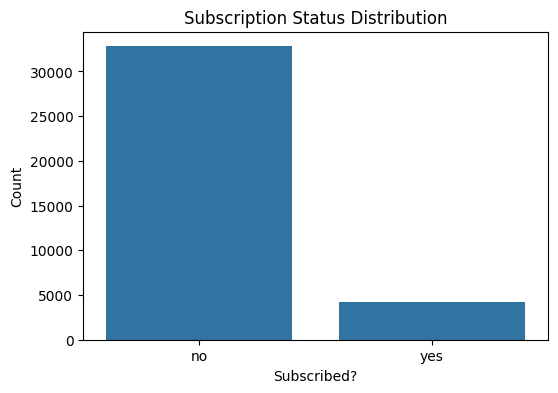

(np.float64(10.175293774885889), np.float64(79.63484510051472))

In [32]:
sub_counts = df_cleaned['Subscription Status'].value_counts()

plt.figure(figsize=(6,4))
sns.countplot(data=df_cleaned, x='Subscription Status')
plt.title("Subscription Status Distribution")
plt.xlabel("Subscribed?")
plt.ylabel("Count")
plt.show()

# Percentage calculation
yes_rate = (sub_counts.get('yes', 0) / df.shape[0]) * 100
no_rate = (sub_counts.get('no', 0) / df.shape[0]) * 100

yes_rate, no_rate

Most clients did not subscribe to the term deposit.

Only a small portion of clients said “yes”, making this a highly imbalanced dataset.

**Age Distribution**

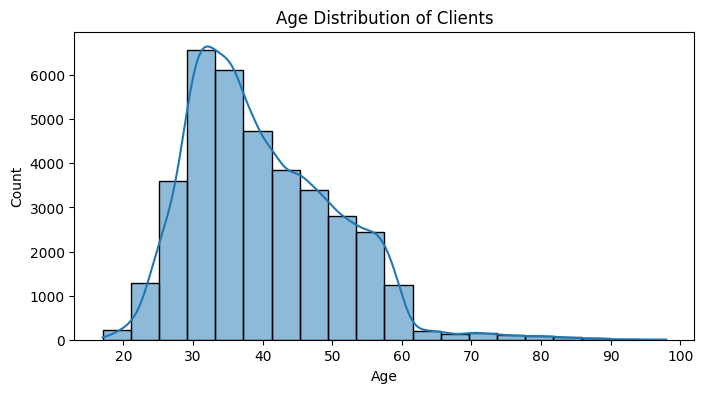

In [33]:
# Remove the word "years" and any extra spaces
df_cleaned['Age'] = df_cleaned['Age'].astype(str).str.replace("years", "", regex=False).str.strip()
df_cleaned['Age'] = pd.to_numeric(df_cleaned['Age'], errors='coerce')
df_cleaned = df_cleaned.dropna(subset=['Age'])
df_cleaned['Age'] = df_cleaned['Age'].astype(int)

plt.figure(figsize=(8,4))
sns.histplot(df_cleaned['Age'], bins=20, kde=True)
plt.title("Age Distribution of Clients")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()


**Comparing Age vs Subscription Status**

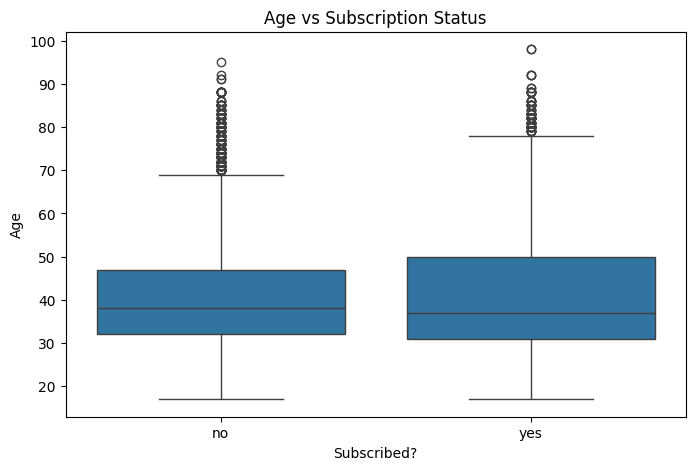

In [34]:
plt.figure(figsize=(8,5))
sns.boxplot(data=df_cleaned, x='Subscription Status', y='Age')
plt.title("Age vs Subscription Status")
plt.xlabel("Subscribed?")
plt.ylabel("Age")
plt.show()


The boxplot shows that the age distribution between customers who subscribed (“yes”) and those who did not (“no”) is very similar. Both groups have a median age around the late 30s. While there are older clients (shown as outliers), the overall spread of ages does not differ significantly between the two groups. This suggests that age alone is not a strong predictor of subscription.

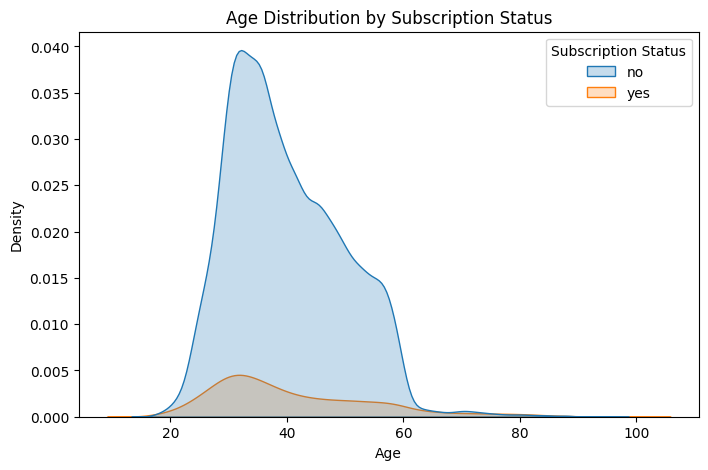

In [35]:
plt.figure(figsize=(8,5))
sns.kdeplot(data=df_cleaned, x='Age', hue='Subscription Status', fill=True)
plt.title("Age Distribution by Subscription Status")
plt.show()


The density plot shows that the age distributions for subscribers and non-subscribers are highly similar. Most clients fall between 25–60 years old, and both groups share the same general shape. This suggests that age is not a strong distinguishing factor in determining whether a client will subscribe. The dataset also contains very few clients above age 60.

**Comparing Age Group vs Subscription Status**

As individual ages data and analysis is very scarce, attempting to look at it in age groups would help to understand the data further

In [36]:
bins = [18, 25, 35, 45, 55, 65, 90]
labels = ['18–25', '26–35', '36–45', '46–55', '56–65', '66+']

# create age_group in df_cleaned
df_cleaned['age_group'] = pd.cut(df_cleaned['Age'],
                                 bins=bins,
                                 labels=labels,
                                 right=False)

# compute subscription rate (%) by age group
age_group_rates = (
    df_cleaned
      .groupby('age_group')['Subscription Status']
      .value_counts(normalize=True)
      .unstack()
      .fillna(0)['yes'] * 100
)

age_group_rates


C:\Users\dooth\AppData\Local\Temp\ipykernel_22760\3550188033.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby('age_group')['Subscription Status']


age_group
18–25    23.933403
26–35    12.253705
36–45     8.730420
46–55     8.600770
56–65    13.563004
66+      47.804054
Name: yes, dtype: float64

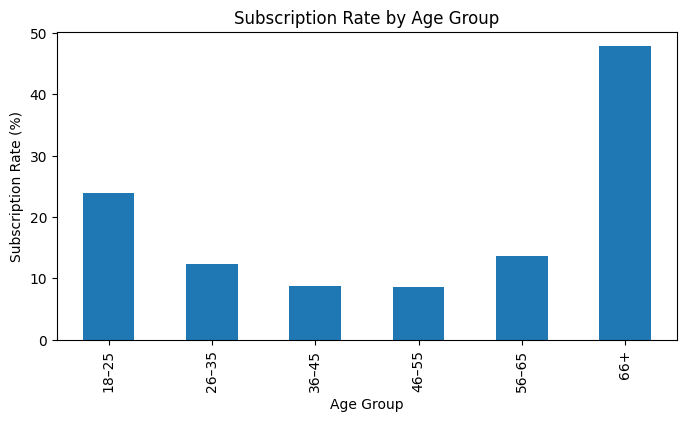

In [37]:
plt.figure(figsize=(8,4))
age_group_rates.plot(kind='bar')
plt.title("Subscription Rate by Age Group")
plt.ylabel("Subscription Rate (%)")
plt.xlabel("Age Group")
plt.show()


The clients most likely to subscribe are older adults (66+) and young adults (18–25), while middle-aged groups show significantly lower subscription rates, likely due to different financial priorities. This highlights clear age-based segmentation opportunities for future marketing strategies.

**Occupations Distribution**

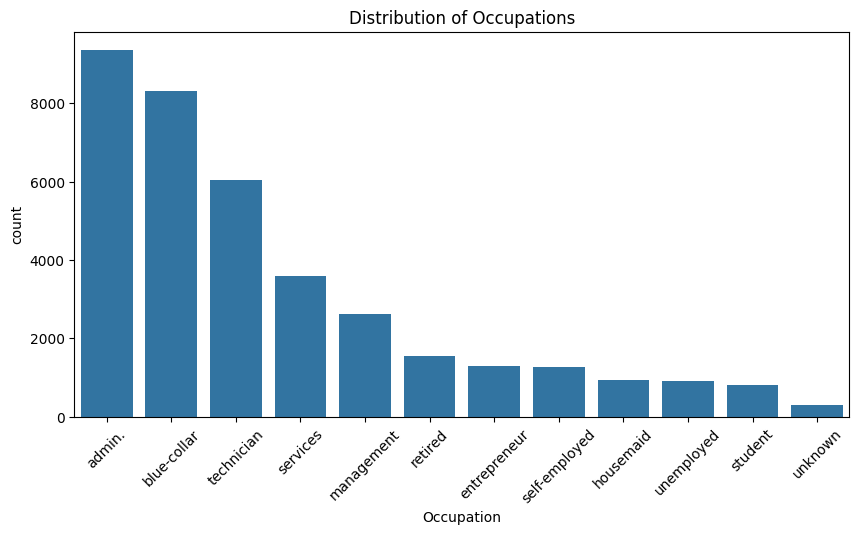

In [38]:
plt.figure(figsize=(10,5))
sns.countplot(data=df_cleaned, x='Occupation', order=df_cleaned['Occupation'].value_counts().index)
plt.title("Distribution of Occupations")
plt.xticks(rotation=45)
plt.show()


**Subscription Rates vs Occupation**

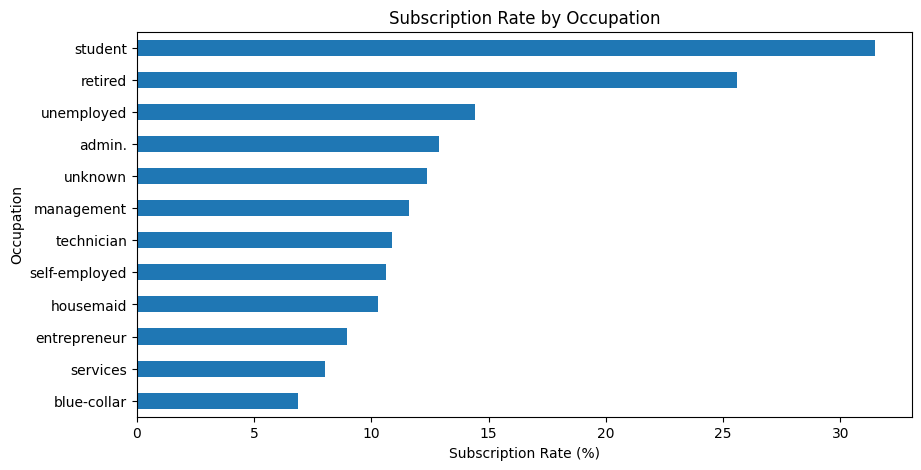

In [39]:
occupation_rates = (
    df_cleaned.groupby('Occupation')['Subscription Status']
    .value_counts(normalize=True)
    .unstack()
    .fillna(0)['yes'] * 100
)

plt.figure(figsize=(10,5))
occupation_rates.sort_values().plot(kind='barh')
plt.title("Subscription Rate by Occupation")
plt.xlabel("Subscription Rate (%)")
plt.show()


Occupation has a clear impact on subscription behaviour. Students and retired clients show the highest subscription rates, making them strong target segments for term deposit campaigns. Middle-income groups such as admin, management, and technical roles show moderate response, while blue-collar and service-oriented occupations have the lowest subscription rates. This indicates that job stability, financial flexibility, and life stage significantly influence the likelihood of subscribing.

**Distribution of Marital Status**

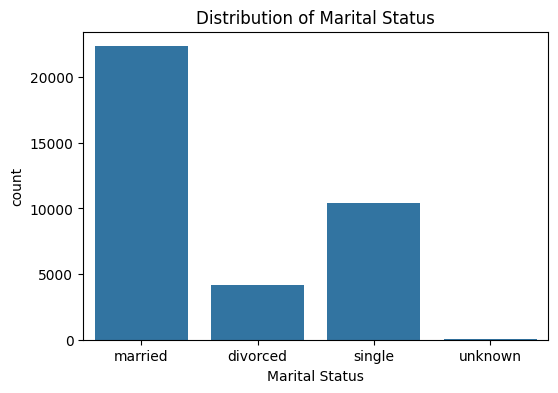

In [40]:
plt.figure(figsize=(6,4))
sns.countplot(data=df_cleaned, x='Marital Status')
plt.title("Distribution of Marital Status")
plt.show()


**Subscription Rate vs Marital Status**

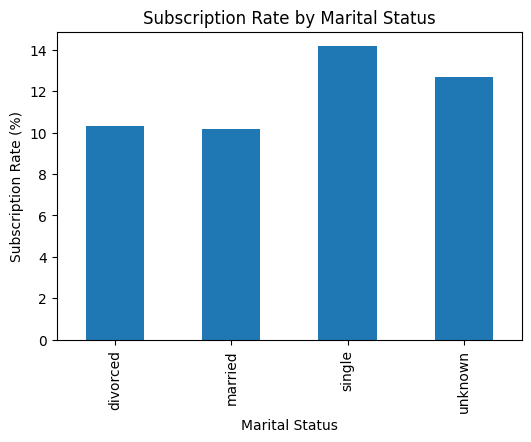

In [41]:
marital_rates = (
    df_cleaned.groupby('Marital Status')['Subscription Status']
    .value_counts(normalize=True)
    .unstack()
    .fillna(0)['yes'] * 100
)

plt.figure(figsize=(6,4))
marital_rates.plot(kind='bar')
plt.title("Subscription Rate by Marital Status")
plt.ylabel("Subscription Rate (%)")
plt.show()


Marital status influences subscription behaviour. Single clients have the highest subscription rate, suggesting they are more receptive to term deposit offers. Married and divorced clients subscribe at similar moderate levels, likely due to greater financial commitments.

Interestingly, the “unknown” category also performs well, implying that missing marital data may correspond to younger or more financially active customers. Overall, marital status provides useful segmentation insights for targeted marketing.

**Education Levels Distribution**

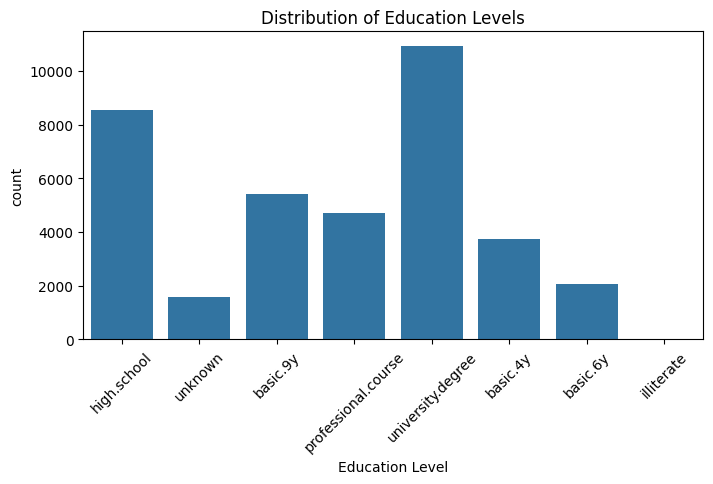

In [42]:
plt.figure(figsize=(8,4))
sns.countplot(data=df_cleaned, x='Education Level')
plt.title("Distribution of Education Levels")
plt.xticks(rotation=45)
plt.show()


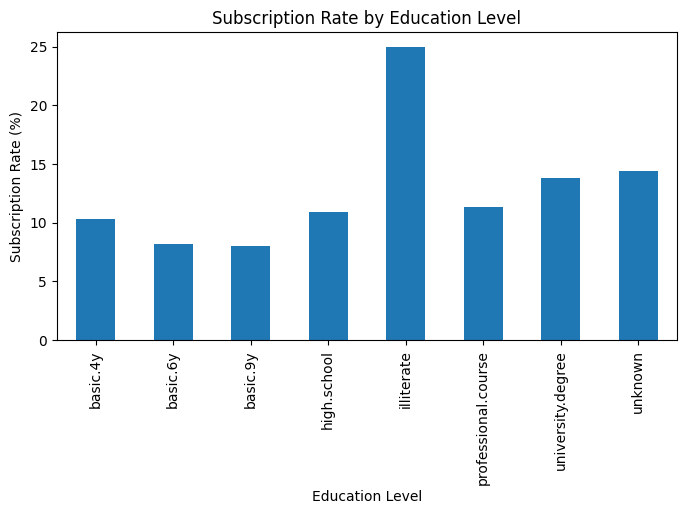

In [43]:
edu_rates = (
    df_cleaned.groupby('Education Level')['Subscription Status']
    .value_counts(normalize=True)
    .unstack()
    .fillna(0)['yes'] * 100
)

plt.figure(figsize=(8,4))
edu_rates.plot(kind='bar')
plt.title("Subscription Rate by Education Level")
plt.ylabel("Subscription Rate (%)")
plt.show()


Education level shows clear patterns in subscription behaviour. Clients with the highest education levels (university degree) tend to have higher subscription rates, likely due to greater financial literacy and income stability.

Surprisingly, the “illiterate” group has an extremely high subscription rate, but this is likely influenced by small sample size and should be interpreted with caution. Basic education groups consistently show the lowest subscription rates, indicating that financial understanding may influence willingness to invest in term deposits. Overall, education is a meaningful predictor of subscription behaviour.

# Data Preparation

In [44]:
df_cleaned.columns

Index(['Client ID', 'Age', 'Occupation', 'Marital Status', 'Education Level',
       'Credit Default', 'Housing Loan', 'Personal Loan', 'Contact Method',
       'Campaign Calls', 'Previous Contact Days', 'Subscription Status',
       'age_group'],
      dtype='object')

In [45]:
occupation_dict = {}
value = 0
for occu in df_cleaned['Occupation'].unique():
    value += 1
    occupation_dict[occu] = value
occupation_dict

{'technician': 1,
 'unknown': 2,
 'blue-collar': 3,
 'admin.': 4,
 'housemaid': 5,
 'retired': 6,
 'services': 7,
 'entrepreneur': 8,
 'unemployed': 9,
 'management': 10,
 'self-employed': 11,
 'student': 12}

In [46]:
marital_dict = {}
value = 0
for marital in df_cleaned['Marital Status'].unique():
    value += 1
    marital_dict[marital] = value
marital_dict

{'married': 1, 'divorced': 2, 'single': 3, 'unknown': 4}

In [47]:
edu_dict = {}
value = 0
for edu in df_cleaned['Education Level'].unique():
    value += 1
    edu_dict[edu] = value
edu_dict

{'high.school': 1,
 'unknown': 2,
 'basic.9y': 3,
 'professional.course': 4,
 'university.degree': 5,
 'basic.4y': 6,
 'basic.6y': 7,
 'illiterate': 8}

In [48]:
credit_default_dict = {}
value = 0
for credit in df_cleaned['Credit Default'].unique():
    value += 1
    credit_default_dict[credit] = value
credit_default_dict

{'no': 1, 'unknown': 2, 'yes': 3}

In [49]:
housing_loan_dict = {}
value = 0
for housing in df_cleaned['Housing Loan'].unique():
    value += 1
    housing_loan_dict[housing] = value
housing_loan_dict

{'no': 1, 'yes': 2, 'unknown': 3}

In [50]:
personal_loan_dict = {}
value = 0
for personal in df_cleaned['Personal Loan'].unique():
    value += 1
    personal_loan_dict[personal] = value
personal_loan_dict

{'yes': 1, 'no': 2, 'unknown': 3}

In [51]:
contact_dict = {}
value = 0
for contact in df_cleaned['Contact Method'].unique():
    value += 1
    contact_dict[contact] = value
contact_dict

{'cellular': 1, 'telephone': 2}

In [52]:
campaign_dict = {}
value = 0
for campaign in df_cleaned['Campaign Calls'].unique():
    value += 1
    campaign_dict[campaign] = value
campaign_dict

{np.int64(1): 1,
 np.int64(2): 2,
 np.int64(4): 3,
 np.int64(3): 4,
 np.int64(15): 5,
 np.int64(12): 6,
 np.int64(9): 7,
 np.int64(5): 8,
 np.int64(13): 9,
 np.int64(6): 10,
 np.int64(14): 11,
 np.int64(42): 12,
 np.int64(8): 13,
 np.int64(7): 14,
 np.int64(11): 15,
 np.int64(17): 16,
 np.int64(18): 17,
 np.int64(10): 18,
 np.int64(28): 19,
 np.int64(33): 20,
 np.int64(16): 21,
 np.int64(24): 22,
 np.int64(20): 23,
 np.int64(22): 24,
 np.int64(23): 25,
 np.int64(19): 26,
 np.int64(29): 27,
 np.int64(26): 28,
 np.int64(21): 29,
 np.int64(25): 30,
 np.int64(32): 31,
 np.int64(27): 32,
 np.int64(30): 33,
 np.int64(31): 34,
 np.int64(35): 35,
 np.int64(56): 36,
 np.int64(40): 37,
 np.int64(43): 38,
 np.int64(34): 39,
 np.int64(41): 40,
 np.int64(39): 41,
 np.int64(37): 42}

In [53]:
prev_contact_dict = {}
value = 0
for prev in df_cleaned['Previous Contact Days'].unique():
    value += 1
    prev_contact_dict[prev] = value
prev_contact_dict

{np.int64(999): 1,
 np.int64(3): 2,
 np.int64(10): 3,
 np.int64(6): 4,
 np.int64(13): 5,
 np.int64(4): 6,
 np.int64(5): 7,
 np.int64(9): 8,
 np.int64(15): 9,
 np.int64(14): 10,
 np.int64(7): 11,
 np.int64(12): 12,
 np.int64(1): 13,
 np.int64(0): 14,
 np.int64(2): 15,
 np.int64(11): 16,
 np.int64(8): 17,
 np.int64(17): 18,
 np.int64(18): 19,
 np.int64(21): 20,
 np.int64(19): 21,
 np.int64(16): 22,
 np.int64(26): 23,
 np.int64(22): 24,
 np.int64(27): 25,
 np.int64(20): 26,
 np.int64(25): 27}

In [54]:
sub_stat_dict = {}
value = 0
for sub in df_cleaned['Subscription Status'].unique():
    value += 1
    sub_stat_dict[sub] = value
sub_stat_dict

{'no': 1, 'yes': 2}

In [55]:
for col in df_cleaned.columns:
    if df_cleaned[col].dtype == 'object':
        if col == 'Occupation':
            df_cleaned['occ_num'] = df_cleaned[col].map(occupation_dict)
        if col == 'Marital Status':
            df_cleaned['mar_num'] = df_cleaned[col].map


print(df_cleaned.head())

   Client ID  Age   Occupation Marital Status Education Level Credit Default  \
0      32885   57   technician        married     high.school             no   
1       3170   55      unknown        married         unknown        unknown   
2      32207   33  blue-collar        married        basic.9y             no   
3       9404   36       admin.        married     high.school             no   
4      14021   27    housemaid        married     high.school             no   

  Housing Loan Personal Loan Contact Method  Campaign Calls  \
0           no           yes       cellular               1   
1          yes            no      telephone               2   
2           no            no       cellular               1   
3           no            no      telephone               4   
4      unknown            no       cellular               2   

   Previous Contact Days Subscription Status age_group  occ_num  \
0                    999                  no     56–65        1   
1     